In [1]:
# 데이터 구성 패키지: Series, DataFrame
import pandas as pd

# 행렬 연산 패키지
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt

# 데이터 시각화(추세 등) 패키지
import seaborn as sns

# 추검정 및 통계 분석 패키지
from scipy import stats
import scipy.stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

In [2]:
# 한글 폰트(맑은 고딕) 적용
matplotlib.rc('font', family='Malgun Gothic')

## p.41[실습] 정규분포 그리기

 - 정규분포 이해하기
  - Random Data 생성 : n = 100,000, x bar = 30, Standard Deviation = 2.5
 

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


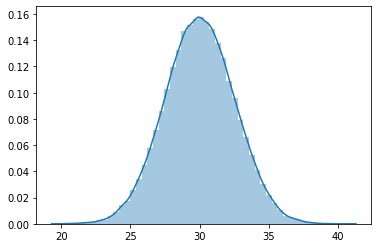

In [3]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)
# 평균: 30, 표준편차: 2.5, 데이터 수: 100000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(30, 2.5, 100000)
#histogram
sns.distplot(normal)

정규분포는 수집된 자료의 분포를 근사하는 데에 자주 사용됨.\
이는 중심극한정리에 의해 독립적인 확률변수들의 평균은 정규분포에 가까워지는 성질이 있기 때문이다.

## p.45[실습] 정규분포 확률계산
 - 대한민국 남성의 20~30대 키를 측정한 결과, 평균 175cm, 표준편차 5cm 이다.
 - 나의 키가 180cm 일 경우에 나는 몇 % 범위에 위치할까요?

In [5]:
# 누적확률 값 계산
mu = 175
sigma = 5
x = 180

prob = stats.norm.cdf(x, mu, sigma)
print('키가 {0} 인 경우 {1:.1f}%에 위치합니다.'.format(x, (1-prob)*100))

키가 180 인 경우 15.9%에 위치합니다.


- 누적분포함수를 통해 180 까지에 해당되는 범위를 구하고 이를 전체인 1에서 빼주면서 구한다.

## p.45[실습] 정규분포 확률계산
 - 어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차가 3km인 정규분포를 이룬다.
  - 1) 1리터를 가지고 9km이상 15km 이하를 달릴 확률은 얼마인가요?
  - 2) 1리터를 가지고 15km 이상을 달릴 확률은 얼마인가요?
  

In [11]:
# 누적확률 값 계산
mu = 12
sigma = 3
x1 = 15
prob1 = stats.norm.cdf(x1, mu, sigma)
print('1) {0}km 이상 {1}km 이하를 달릴 확률은 {2:.1f}%에 해당합니다.'.format('9', x1, (prob1-0.5)*200))
print('2) {0}km 이상을 달릴 확률은 {1:.1f}%에 해당합니다.'.format(x1, (1-prob1)*100))

1) 9km 이상 15km 이하를 달릴 확률은 68.3%에 해당합니다.
2) 15km 이상을 달릴 확률은 15.9%에 해당합니다.


1번의 경우 12km가 평균이므로 한쪽 범위를 구해 2배를 곱하여 구함.\
2번의 경우 15km 이상이므로 15km 까지의 범위를 구해 전체 1에서 빼줌.

## p.54[실습] 표준정규분포 그리기
 - Random Data 생성 : n = 100,000, x bar = 0, Standard Deviation = 1
 

array([ 0.471, -1.191,  1.433, ...,  0.029, -1.221,  0.384])

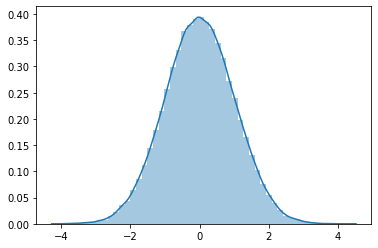

In [13]:
np.random.seed(1234)

# 평균:0, 표준편차: 1, 데이터수: 100000
normal = np.random.normal(0,1,100000)

#histogram
sns.distplot(normal)

# 데이터 확인
normal.round(3)

평균이 0이고 표준편차가 1인 정규분포를 표준정규분포라고 하며 정규분포를 Z로 정규화한 것.

## p.58 [실습] t분포 그리기 연습
 - Random Data 생성 : n=10,000, degree of freedom = 5
 - Random Data 생성 : n=10,000, degree of freedom = 50


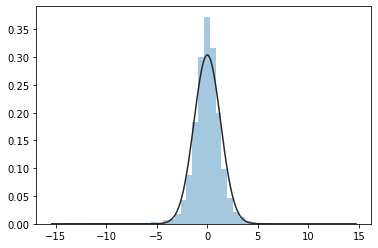

In [15]:
np.random.seed(1234)

# 자유도: 5, 데이터수 : 10000개의 t 분포를 따르는 데이터 생성
t_df05 = np.random.standard_t(df=5, size=10000)
sns.distplot(t_df05, fit = stats.norm, kde = False)



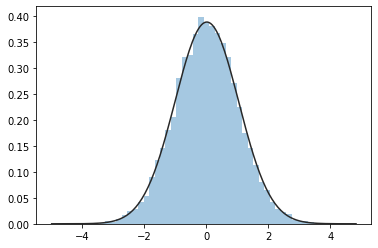

In [16]:
# 자유도: 50, 데이터수 : 10000개의 t 분포를 따르는 데이터 생성
t_df50 = np.random.standard_t(df=50, size=10000)
sns.distplot(t_df50, fit=stats.norm, kde = False)

 - t-분포는 모평균의 추,검정에서 모표준편차를 모를 때 정규분포 대신 사용됨
 - t 분포는 정규분포보다 더 넓고 꼬리 부분이 더 평평하지만, 대칭형이며 종모양이라는 점에서 정규분포와 형태가 비슷함.
 - 표본 크기가 더 적으면 적을수록 분포의 꼬리는 더 평평해 짐

## p.60 [실습] t분포
 - 확률변수 t는 자유도가 100인 t-분포를 따른다.
 - t 값이 2.0일 때, P(T<=t)을 계산하시오.


In [17]:
t = 2.0
df = 100
prob = stats.t.cdf(t,df)
print("P(T<=F):{:.3f}".format(prob))

P(T<=F):0.976


확률변수 T가 2.0보다 작고 자유도가 100인 t-분포에서 누적분포함수를 이용하여 구할 수 있다.

## p.64 [실습] 카이제곱 분포
 - 카이제곱 분포 그리기 연습(자유도 변화에 따른 분포 변화 이해하기)
 - Random Data 생성 : n = 1000, degree of freedom = 3
 - Random Data 생성 : n = 1000, degree of freedom = 50

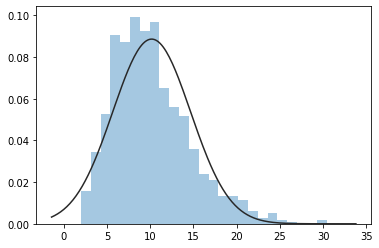

In [20]:
# seed 선택을 하여 매번 실행시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

# 자유도: 10, 데이터 수: 1000개의 X^2 분포를 따르는 데이터 생성
chisq_df10 = np.random.chisquare(df=10, size=1000)

# histogram, fit: 정규분포 선 생성, kde: X^2 분포의 kde 생성 안함
sns.distplot(chisq_df10, fit = stats.norm, kde = False)

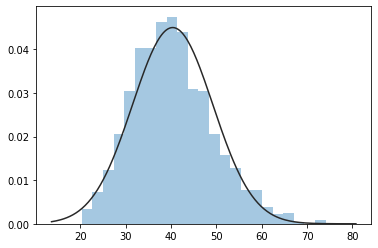

In [21]:
# seed 선택을 하여 매번 실행시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

# 자유도: 40, 데이터 수: 1000개의 X^2 분포를 따르는 데이터 생성
chisq_df10 = np.random.chisquare(df=40, size=1000)

# histogram, fit: 정규분포 선 생성, kde: X^2 분포의 kde 생성 안함
sns.distplot(chisq_df10, fit = stats.norm, kde = False)

- 카이제곱 분포란 정규분포를 따르는 모집단에서 크기가 n인 표본을 무작위로 반복하여 추출하였을 때, 각 표본에 대해 구한 표본분산들은 카이제곱 분포를 따름.
- 한 집단만을 하여 0이하는 없다.
- 모집단의 분산 추정
- 빈도기반의 분포 또는 형태 적합도 검정에 사용된다.

## p.66 [실습] 카이제곱 분포
 - 확률변수 카이제곱은 자유도가 8인 카이제곱분포를 따른다
 - 카이제곱 값이 3.0일때, P(X<= 카이제곱)을 계산하시오.

In [22]:
chisq = 3.0
df = 8
# 누적확률 값 계산
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}) : {1:.4f}".format(chisq, prob))

P(X<=3.0) : 0.0656


확률변수 X가 카이제곱 값 3.0 보다 작은 경우를 구하기 위해 누적 분포 함수를 활용하여 구한다.

## p.71[실습] F-분포
 - F분포 그리기 연습(자유도 변화에 따른 분포 변화 이해하기)
  - Random Data 생성 : n=100, numerator degree of freedom = 10, denominator degree of freedom = 10
  - Random Data 생성 : n=100, numerator degree of freedom = 10, denominator degree of freedom = 50
  

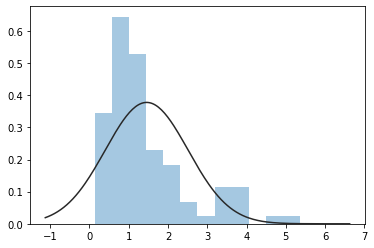

In [24]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

# 분자 자유도 10, 분모 자유도: 10
# 데이터 수: 100개의 F 분포를 따르는 데이터 생성
F_df10_10 = np.random.f(dfnum=10, dfden=10, size=100)

# histogram, fit: 정규분포 선 생성, kde: F 분포의 kde 생성 안함
sns.distplot(F_df10_10, fit = stats.norm, kde = False)

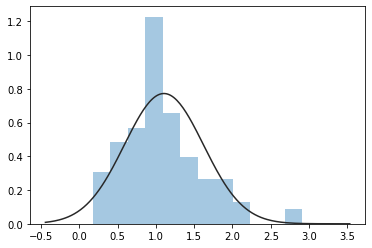

In [25]:
# seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

# 분자 자유도 10, 분모 자유도: 50
# 데이터 수: 1000개의 F 분포를 따르는 데이터 생성
F_df10_10 = np.random.f(dfnum=10, dfden=50, size=100)

# histogram, fit: 정규분포 선 생성, kde: F 분포의 kde 생성 안함
sns.distplot(F_df10_10, fit = stats.norm, kde = False)

- 로널드 퓌셔
- 분산이 같은 두 정규모집단으로부터 확률표본을 반복하여 독립적으로 추출하여 구한 두 표본분산의 비율들의 표본분포
- 두 분포의 분산을 비교하는데 활용
- 분산의 비로 구한다.

## p.73[실습] F-분포
 - 확률변수 F는 각각 자유도가 10, 100인 F-분포를 따른다.
 - F 값이 1.5일 때, P( X<= F)을 계산하시오.


In [26]:
f = 1.5
dfnum = 10
dfden = 100

# 누적확률 값 계산
prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {:.3f}".format(prob))

P(X<=F): 0.850


확률변수 X를 1.5이하로 구하기 위해 누적분포함수인 cdf를 활용하여 범위를 구한다.

## p.77[실습] Weibull 분포
 - 어떤 제품의 수명시간x 가 형상모수 5.2, 척도모수 2,200 인 와이블 분포를 따른다고 할 때, 이 제품이 적어도 2,500시간 이상 작동할 확률을 구하라.
 

In [29]:
x = 2500X
alpha = 5.2
beta = 2200

# 누적 확률 값 계산
prob = stats.weibull_min.cdf(x, alpha, scale=beta)
print("P(X>=x): {:.3f}".format(1 - prob))

P(X<=x): 0.143


 - 와이블분포란? 시간 또는 수명등과 같이 신뢰성과 수명시험 문제에 적용되는 분포도로 지수분포를 보다 일반화시켜, 다양한 확률분포 형태를 모두 나타낼 수 있도록 고안


 - 확률변수 X를 2500시간 이상의 값으로 구하기 위해 누적분포함수를 활용해 전체인 1에서 뺀다.

## p.77[실습] 이항분포
 - 도장공정에서 광택도 불량이 30%나 된다고 함
 - 5대의 차량을 임의로 선택했을 때 불량대수가 각각 0, 1, 2, 3, 4, 5 대가 나올 확률은 얼마인가요?
 

In [30]:
n = 5
for i in range(n+1):
    # 이항분포 Probability Mass Function
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i,prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


 - 이항분포, 베르누이 실험을 여러 번 시행해 특정한 횟수의 성공/실패, 양품/불량품을 알고자 할때 사용되는 분포
 - 베르누이 : 상호배타적인 원소로 구성된 실험의 시행
 
 - 각각의 경우에 따라 확률변수를 구하기 위해 확률 질량 함수를 이용한다. 

## p.87[실습] 포아송분포
 - 한 상점에는 평균 1시간에 3명씩 포아송분포로 손님이 도착한다.
 - 이 때 10시에서 11시 사이에 다음이 발생할 확률을 구하시오.
  - 1) 2명의 손님이 도착
  - 2) 1명 이하의 손님이 도착
  - 3) 3명 이상의 손님이 도착
  

In [32]:
# 평균
mu = 3
# 시간당 2명의 손님이 도착하는 경우
prob = stats.poisson.pmf(2,mu)
# 시간당 1명 이하의 손님이 도착하는 경우
cdf_prob = stats.poisson.cdf(1,mu)
# 시간당 3명 이상의 손님이 도착하는 경우
cdf2_prob = 1 - stats.poisson.cdf(2,mu)

print('1) {0}명의 손님이 도착하는 확률 : {1:.1f}'.format(2, prob*100))
print('2) {0}명 이하의 손님이 도착하는 확률 : {1:.1f}'.format(1, cdf_prob*100))
print('3) {0}명 이상의 손님이 도착하는 확률 : {1:.1f}'.format(3, cdf2_prob*100))

1) 2명의 손님이 도착하는 확률 : 22.4
2) 1명 이하의 손님이 도착하는 확률 : 19.9
3) 3명 이상의 손님이 도착하는 확률 : 57.7


 - 포아송분포란? 일정한 시간 또는 일정한 공간에서 발생하는 성공횟수에 대한 이산확률분포이며 일정 시간/공간에서의 사건 발생 확률을 예측하는데 쓰인다.
 
 - 2명이라고 정해진 경우 확률 질량 함수를 이용하여 접근하여 구한다.
 - 1명 이하, 3명 이상의 손님이 도착하는 경우는 누적 분포 함수를 활용하여 범위를 구하여 구한다.